<a href="https://colab.research.google.com/github/AnaliaLeyez/analialeyez.github.io/blob/main/u3_lectura_de_datasets_02_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNIDAD III - Lectura de datatset - JSON, HTML, XML, XLSX

Trabajando con formatos JSON, XML, HTML, XLSX

_El notebook esta basado en el contenido del libro Python for Data Analysis. Chapter 6 Data Loading, Storage, and File Formats. (Wes McKinney)_


En el trabajo con Ciencia de Datos, los datos rara vez vienen en un único formato simple. Según la fuente, podemos encontrarlos en archivos estructurados como Excel, en archivos semiestructurados como JSON o XML, o incluso incrustados en páginas web en formato HTML.

En esta unidad vamos a introducir herramientas de Python (pandas y librerías complementarias) para leer y manipular estos distintos formatos.

- JSON (JavaScript Object Notation): Es un formato muy utilizado para intercambio de datos, especialmente en APIs. Representa estructuras de datos con pares clave–valor (similar a un diccionario de Python). Python permite cargar JSON con el módulo json o directamente con pandas.read_json().

- XML (Extensible Markup Language): Es un formato jerárquico y basado en etiquetas. Se utiliza mucho en entornos empresariales, documentos y servicios web antiguos. Requiere extraer la información recorriendo el árbol de nodos (xml.etree.ElementTree o librerías como lxml).

- HTML (HyperText Markup Language): Es el formato en que se estructuran las páginas web. Muchas veces los datos se encuentran en tablas HTML, por lo que podemos usar pandas.read_html() para extraerlos de forma directa. También se puede usar BeautifulSoup para un mayor control sobre el parseo.

- XLSX (Excel): Es uno de los formatos más comunes en oficinas y empresas.Pandas soporta lectura y escritura con read_excel() y to_excel().

# Iniciamos directorios de datos

**IMPORTANTE**: Este notebook necesita una serie de archivos para poder ejecutarse. Antes de seguir hay que realizar los siguientes pasos.

1. Descargar el archivo [u3-lectura-de-datasets-archivos.zip](https://drive.google.com/file/d/111pNyEETcK8nPNvHgcM8cxmaLfzjJOBJ/view?usp=drive_link) (es un archivo .zip que posee varios archivos de datos para este notebook)
2. Para usarlos en colab subir dicho archivo .zip al directorio de trabajo de colab.
3. Asegurarse que el archivo en tu entorno haya quedado con el siguiente nombre `u3-lectura-de-datasets-archivos.zip`

In [ ]:
# o se puede obtener con el siguiente comando.
!wget "https://drive.google.com/u/3/uc?id=111pNyEETcK8nPNvHgcM8cxmaLfzjJOBJ&export=download" -O u3-lectura-de-datasets-archivos.zip


--2025-09-19 20:35:20--  https://drive.google.com/u/3/uc?id=111pNyEETcK8nPNvHgcM8cxmaLfzjJOBJ&export=download
Resolving drive.google.com (drive.google.com)... 142.250.141.101, 142.250.141.100, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=111pNyEETcK8nPNvHgcM8cxmaLfzjJOBJ&export=download [following]
--2025-09-19 20:35:20--  https://drive.google.com/uc?id=111pNyEETcK8nPNvHgcM8cxmaLfzjJOBJ&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=111pNyEETcK8nPNvHgcM8cxmaLfzjJOBJ&export=download [following]
--2025-09-19 20:35:21--  https://drive.usercontent.google.com/download?id=111pNyEETcK8nPNvHgcM8cxmaLfzjJOBJ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 

El siguiente comando descomprime el archivo y genera los archivos necesarios para este notebook.

In [ ]:
!unzip -o u3-lectura-de-datasets-archivos.zip

Archive:  u3-lectura-de-datasets-archivos.zip
   creating: examples/
  inflating: examples/array_ex.txt   
  inflating: examples/csv_mindex.csv  
  inflating: examples/ex1.csv        
  inflating: examples/ex1.xlsx       
 extracting: examples/ex2.csv        
  inflating: examples/ex3pipe.txt    
  inflating: examples/ex3.txt        
  inflating: examples/ex4.csv        
  inflating: examples/ex5.csv        
  inflating: examples/ex6.csv        
  inflating: examples/ex7.csv        
  inflating: examples/example.json   
  inflating: examples/fdic_failed_bank_list.html  
  inflating: examples/ipython_bug.py  
  inflating: examples/macrodata.csv  
  inflating: examples/out.csv        
  inflating: examples/segismundo.txt  
  inflating: examples/spx.csv        
  inflating: examples/stinkbug.png   
  inflating: examples/stock_px.csv   
  inflating: examples/test_file.csv  
  inflating: examples/tseries.csv    
  inflating: examples/volume.csv     
  inflating: examples/yahoo_price.pkl  
 

# Importamos dependencias

In [ ]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

# Formatos estructurados y semi-estructurados

## Un ejemplo

Imaginemos que queremos guardar información de una persona y su familia.


1. Datos de la persona

Nombre: Wes

Mascota: No tiene

Edad: 38

Ciudades en las que vivió: Akron, Nashville, New York, San Francisco

2. Datos de sus hermanos

Hermano 1:

Nombre: Scott

Edad: 34

Hobbies: guitarra, fútbol

Hermano 2:

Nombre: Katie

Edad: 42

Hobbies: buceo, arte

De esto podemos concluir que:
- La persona (Wes) tiene información propia: nombre, edad, mascota y ciudades donde vivió.

- Además, dentro de esa información aparece otra lista de elementos (sus hermanos), y cada hermano tiene sus propios datos.


##Escructurados

Cuando los datos están en filas y columnas fijas (como una planilla de Excel, un CSV o SQL)

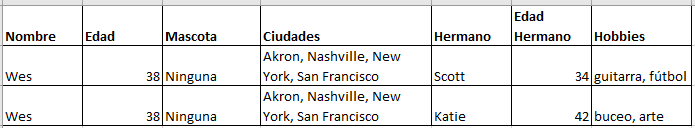


Todo cabe en filas y columnas, pero hay repetición de datos (la persona Wes se repite).

##Semi-estructurados
Cuando los datos tienen una forma más flexible y jerárquica, en niveles, con listas y subelementos. Cuando no encajan perfectamente en una tabla y son más fáciles de representar en formatos como JSON, XML

La siguiente es una representacion de los datos anterios en JSON, aca los datos se organizan en niveles y listas, como un diccionario de Python con sub-elementos.



```
{
  "Persona": {
    "Nombre": "Wes",
    "Edad": 38,
    "Mascota": "No tiene",
    "Ciudades": ["Akron", "Nashville", "New York", "San Francisco"],
    "Hermanos": [
      {
        "Nombre": "Scott",
        "Edad": 34,
        "Hobbies": ["guitarra", "fútbol"]
      },
      {
        "Nombre": "Katie",
        "Edad": 42,
        "Hobbies": ["buceo", "arte"]
      }
    ]
  }
}

```



En el formato XML

```xml
<Persona>
  <Nombre>Wes</Nombre>
  <Edad>38</Edad>
  <Mascota>No tiene</Mascota>
  <Ciudades>
    <Ciudad>Akron</Ciudad>
    <Ciudad>Nashville</Ciudad>
    <Ciudad>New York</Ciudad>
    <Ciudad>San Francisco</Ciudad>
  </Ciudades>
  <Hermanos>
    <Hermano>
      <Nombre>Scott</Nombre>
      <Edad>34</Edad>
      <Hobbies>
        <Hobby>guitarra</Hobby>
        <Hobby>fútbol</Hobby>
      </Hobbies>
    </Hermano>
    <Hermano>
      <Nombre>Katie</Nombre>
      <Edad>42</Edad>
      <Hobbies>
        <Hobby>buceo</Hobby>
        <Hobby>arte</Hobby>
      </Hobbies>
    </Hermano>
  </Hermanos>
</Persona>

```

- Estructurado → Tablas: fáciles de analizar, pero rígidas y con redundancia.

- Semi-estructurado (JSON/XML) → Flexibles y jerárquicos: ideales para representar relaciones y listas.

# JSON

El formato JSON es muy común porque permite intercambiar datos de manera simple, flexible y entendible por humanos y computadoras.

Lo podemos encontrar:

- En cadenas de texto.

- En archivos .json.

- Como respuesta de servicios web o APIs.

En Python, trabajamos con la librería estándar json.

## 0. Importar la libreria Json

In [ ]:
import json

##1. Representar datos en formato JSON (cadena de texto)

En Python, un JSON cargado como texto se guarda primero en un str (cadena).

In [ ]:
# Creamos una cadena en formato JSON
personastr = """
{
  "nombre": "Wes",
  "edad": 38,
  "ciudades_habitadas": ["Akron", "Nashville", "New York", "San Francisco"],
  "mascotas": null,
  "hermanos": [
    {"nombre": "Scott", "edad": 34, "pasa_tiempo": ["guitarra", "deporte"]},
    {"nombre": "Katie", "edad": 42, "pasa_tiempo": ["moda", "arte"]}
  ]
}
"""

# Verificamos el tipo
type(personastr)


str

## 2. Parsear (convertir) JSON a objeto Python

In [ ]:
# Parseamos la cadena JSON y la convertimos en un diccionario de Python
resultado = json.loads(personastr)

type(resultado)

dict

Ahora result es un diccionario (dict), lo que nos permite acceder a sus elementos fácilmente.

### 3. Acceder a datos del JSON (como diccionario)


In [ ]:
# Consultamos por clave
#resultado["nombre"]
resultado["edad"]

38

In [ ]:
# Una lista dentro del JSON
resultado["ciudades_habitadas"]

['Akron', 'Nashville', 'New York', 'San Francisco']

In [ ]:
# Lista de objetos (los hermanos)
resultado["hermanos"]

[{'nombre': 'Scott', 'edad': 34, 'pasa_tiempo': ['guitarra', 'deporte']},
 {'nombre': 'Katie', 'edad': 42, 'pasa_tiempo': ['moda', 'arte']}]

In [ ]:
# Accedemos a la lista hermanos, tomamos el primer hermano y le pedimos el atributo
resultado["hermanos"][0]["nombre"]

'Scott'

In [ ]:
print(personastr)


{
  "nombre": "Wes",
  "edad": 38,
  "ciudades_habitadas": ["Akron", "Nashville", "New York", "San Francisco"],
  "mascotas": null,
  "hermanos": [
    {"nombre": "Scott", "edad": 34, "pasa_tiempo": ["guitarra", "deporte"]},
    {"nombre": "Katie", "edad": 42, "pasa_tiempo": ["moda", "arte"]}
  ]
}



##4. Convertir un objeto Python a JSON (dumps)

La función json.dumps() hace lo inverso:

Convierte un objeto Python (dict, list, etc.) a una cadena JSON.

In [ ]:
# Convertimos el diccionario a una cadena JSON
asjson = json.dumps(resultado)

print(asjson)
type(asjson)


{"nombre": "Wes", "edad": 38, "ciudades_habitadas": ["Akron", "Nashville", "New York", "San Francisco"], "mascotas": null, "hermanos": [{"nombre": "Scott", "edad": 34, "pasa_tiempo": ["guitarra", "deporte"]}, {"nombre": "Katie", "edad": 42, "pasa_tiempo": ["moda", "arte"]}]}


str

Podemos darle formato legible con indent:

In [ ]:
asjson = json.dumps(resultado, indent=4)
print(asjson)

{
    "nombre": "Wes",
    "edad": 38,
    "ciudades_habitadas": [
        "Akron",
        "Nashville",
        "New York",
        "San Francisco"
    ],
    "mascotas": null,
    "hermanos": [
        {
            "nombre": "Scott",
            "edad": 34,
            "pasa_tiempo": [
                "guitarra",
                "deporte"
            ]
        },
        {
            "nombre": "Katie",
            "edad": 42,
            "pasa_tiempo": [
                "moda",
                "arte"
            ]
        }
    ]
}


El formato json puede representar:

* Un valor: numerico o string 1, 1.3 o "Hola"

* Un Objeto:

```
{ "nombre": "Manuel", "edad": 30 }
```



* Una lista de números: [1, 2, 3, 4, 5]

* Una lista de strings: ["A", "B", "C", "D"]

* Una lista de objetos:


```
[
  {"nombre": "Juan", "edad": 33},
  {"nombre": "Maria", "edad": 41}
]
```



* Una lista de una mezcla de numeros, strings y objetos


## Archivos json en pandas

En muchos casos los datos en formato **JSON** contienen listas de objetos que se pueden representar fácilmente como una **tabla** (DataFrame).


### 1. Archivo JSON de ejemplo

Supongamos que tenemos un archivo llamado **`example.json`** con el siguiente contenido:

```json
[
  {"a": 1, "b": 2, "c": 3},
  {"a": 4, "b": 5, "c": 6},
  {"a": 7, "b": 8, "c": 9}
]

Esto es una lista de 3 objetos, cada uno con las claves a, b, c.

###2. Leer JSON con pandas.read_json()

In [ ]:
# Leemos el archivo JSON directamente
data = pd.read_json("examples/example.json")

# Mostramos el DataFrame
print(data)

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


Usando `read_json()` de pandas podemos leer el formato json rapidamente y representar loa datos como un `Dataframe`. [Pandas read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)

## 3. Exportar un DataFrame a JSON

Pandas también permite guardar datos en JSON usando .to_json().

In [ ]:
#Exportar en formato por defecto
data.to_json("out1.json")

In [ ]:
!cat out1.json
#Este formato guarda cada columna como una serie independiente con índices

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}

Por defecto los datos son exportados como un objeto que enumera todas las series del dataframe.

Usando `orient` se puede hacer que pandas emita los datos como una lista de objetos, lo que es muy útil cuando queremos intercambiar datos con aplicaciones web o APIs.

In [ ]:
data.to_json("out2.json", orient="records")

In [ ]:
!cat out2.json

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]

### 4. Exportar a CSV Con `to_csv`
Podemos tambien exportar el mismo DataFrame a un archivo CSV:

In [ ]:
data.to_csv("out3.csv", index=False)

In [ ]:
!cat "out3.csv"

a,b,c
1,2,3
4,5,6
7,8,9


# Leer datos desde Web APIs

Los sitios web exponen servivios accesibles via HTTPS en formato json. Veremos un caso de como consultar las incidencias (tickets) de un proyecto de github.

Repositorio de pandas en github: https://github.com/pandas-dev/pandas

Los issues pueden verse aquí: https://github.com/pandas-dev/pandas/issues

Los issues en formato json: https://api.github.com/repos/pandas-dev/pandas/issues

### 1. Librería `requests`

La librería `requests` de Python facilita realizar peticiones HTTP/HTTPS.  
Con ella podemos traer datos de la web como si fuesen archivos JSON locales.

Elegimos nuestra URL y realizamos la petición

In [ ]:
import requests

In [ ]:
# Definimos la URL de la API de GitHub para issues de pandas
url = "https://api.github.com/repos/pandas-dev/pandas/issues"

In [ ]:
# Realizamos la petición
resp = requests.get(url)

In [ ]:
# Verificamos el código de estado
resp.status_code

200

Un valor **200** significa que la petición fue exitosa.  
Si no lo fuera, conviene lanzar una excepción para manejar errores.

In [ ]:
# Si la respuesta no fue exitosa, generamos un error
resp.raise_for_status()

### 2. Explorar la respuesta

La respuesta contiene:  
- **Cuerpo (body):** los datos en JSON.  
- **Cabecera (headers):** metadatos de la respuesta.


Podemos ver texto que envió el servicio

In [ ]:
## que hay en el cuerpo
print(resp.text)

[{"url":"https://api.github.com/repos/pandas-dev/pandas/issues/62381","repository_url":"https://api.github.com/repos/pandas-dev/pandas","labels_url":"https://api.github.com/repos/pandas-dev/pandas/issues/62381/labels{/name}","comments_url":"https://api.github.com/repos/pandas-dev/pandas/issues/62381/comments","events_url":"https://api.github.com/repos/pandas-dev/pandas/issues/62381/events","html_url":"https://github.com/pandas-dev/pandas/pull/62381","id":3434303647,"node_id":"PR_kwDOAA0YD86pgLfL","number":62381,"title":"Add failing test for pyarrow datetime merge issue","user":{"login":"Ayomide906","id":218816246,"node_id":"U_kgDODQre9g","avatar_url":"https://avatars.githubusercontent.com/u/218816246?v=4","gravatar_id":"","url":"https://api.github.com/users/Ayomide906","html_url":"https://github.com/Ayomide906","followers_url":"https://api.github.com/users/Ayomide906/followers","following_url":"https://api.github.com/users/Ayomide906/following{/other_user}","gists_url":"https://api.git

In [ ]:
# para ver la cabecera
print(resp.headers)

{'Date': 'Fri, 19 Sep 2025 20:35:25 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept,Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"90b830166efa87c05923cbd4448db130bb111c10b1c1235e816060525982283e"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Link': '<https://api.github.com/repositories/858127/issues?after=Y3Vyc29yOnYyOpLPAAABmTL246jOysHLQw%3D%3D&per_page=30&page=2>; rel="next"', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Op

Vemos el contenido del header (cabecera) en formato amistoso, legible (usando json.dumps)

In [ ]:
print(json.dumps(dict(resp.headers), indent = 4))

{
    "Date": "Fri, 19 Sep 2025 20:35:25 GMT",
    "Content-Type": "application/json; charset=utf-8",
    "Cache-Control": "public, max-age=60, s-maxage=60",
    "Vary": "Accept,Accept-Encoding, Accept, X-Requested-With",
    "ETag": "W/\"90b830166efa87c05923cbd4448db130bb111c10b1c1235e816060525982283e\"",
    "X-GitHub-Media-Type": "github.v3; format=json",
    "Link": "<https://api.github.com/repositories/858127/issues?after=Y3Vyc29yOnYyOpLPAAABmTL246jOysHLQw%3D%3D&per_page=30&page=2>; rel=\"next\"",
    "x-github-api-version-selected": "2022-11-28",
    "Access-Control-Expose-Headers": "ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset",
    "Access-Control-Allow-Origin": "*",
    "Strict-Transport-Security": "max-age=31536000; includeSubdomains; preloa

## 3. Parsear la respuesta a JSON

Podemos convertir el cuerpo de la respuesta a un objeto de Python (lista/dict) directamente con `.json()`.

In [ ]:
# Convertimos la respuesta a JSON (lista de diccionarios)
issues_list = resp.json()

In [ ]:
## cuantos issues recuperamos
print(len(issues_list))

30


### 4. Convertir los issues a un DataFrame

Cada issue es un diccionario. Podemos transformarlos directamente en un DataFrame con pandas.


In [ ]:
# Creamos un DataFrame completo
full = pd.DataFrame(issues_list)
full

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,draft,pull_request,body,closed_by,reactions,timeline_url,performed_via_github_app,state_reason,sub_issues_summary,issue_dependencies_summary
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/62381,3434303647,PR_kwDOAA0YD86pgLfL,62381,Add failing test for pyarrow datetime merge issue,...,False,{'url': 'https://api.github.com/repos/pandas-d...,Closes #61926\r\n\r\n### Summary\r\n\r\nThis P...,None,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/62376,3431920781,PR_kwDOAA0YD86pYFIX,62376,BUG: Raise TypeError for mismatched signed/uns...,...,False,{'url': 'https://api.github.com/repos/pandas-d...,\r\n- [ ] closes #55715 (Replace xxxx with th...,None,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/62375,3431893635,PR_kwDOAA0YD86pX_JP,62375,[backport 2.3.x] CoW: disable chained assignme...,...,False,{'url': 'https://api.github.com/repos/pandas-d...,Backport of https://github.com/pandas-dev/pand...,None,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/62372,3429607314,PR_kwDOAA0YD86pQGoX,62372,TST: groupby.sum with large integers,...,False,{'url': 'https://api.github.com/repos/pandas-d...,- [ ] closes #34681\r\n- [x] [Tests added and ...,None,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/62369,3427402196,I_kwDOAA0YD87MSgHU,62369,API: setitem-with-expansion casting,...,NaN,NaN,This is a doozy:\n\nI'm working through the is...,None,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,"{'total': 0, 'completed': 0, 'percent_complete...","{'blocked_by': 0, 'total_blocked_by': 0, 'bloc..."
5,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/62367,3426964151,PR_kwDOAA0YD86pHIKm,62367,BUG: improve future warning for boolean operat...,...,False,{'url': 'https://api.github.com/repos/pandas-d...,- [x] closes #62260 (Replace xxxx with the Git...,None,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
6,https://api.github.com/repos/pandas-dev/pa

In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         30 non-null     object
 1   repository_url              30 non-null     object
 2   labels_url                  30 non-null     object
 3   comments_url                30 non-null     object
 4   events_url                  30 non-null     object
 5   html_url                    30 non-null     object
 6   id                          30 non-null     int64 
 7   node_id                     30 non-null     object
 8   number                      30 non-null     int64 
 9   title                       30 non-null     object
 10  user                        30 non-null     object
 11  labels                      30 non-null     object
 12  state                       30 non-null     object
 13  locked                      30 non-null     bool  
 

In [ ]:
# Seleccionamos solo algunas columnas relevantes
issues = pd.DataFrame(issues_list, columns=["number", "title", "labels", "state"])
issues.head()

,number,title,labels,state
0,62381,Add failing test for pyarrow datetime merge issue,[],open
1,62376,BUG: Raise TypeError for mismatched signed/uns...,[],open
2,62375,[backport 2.3.x] CoW: disable chained assignme...,[],open
3,62372,TST: groupby.sum with large integers,[],open
4,62369,API: setitem-with-expansion casting,"[{'id': 1741841389, 'node_id': 'MDU6TGFiZWwxNz...",open


In [ ]:
issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   number  30 non-null     int64 
 1   title   30 non-null     object
 2   labels  30 non-null     object
 3   state   30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


### 5. Explorando los datos

Cada fila es un issue con:  
- `number` → identificador único del issue  
- `title` → título descriptivo  
- `labels` → etiquetas (lista de objetos)  
- `state` → estado (abierto o cerrado)

In [ ]:
# Accedemos a la columna labels
issues['labels']

,labels
0,[]
1,[]
2,[]
3,[]
4,"[{'id': 1741841389, 'node_id': 'MDU6TGFiZWwxNz..."
5,[]
6,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=..."
7,[]
8,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=..."
9,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT..."


In [ ]:
# Vemos qué hay en la columna 'labels' del segundo issue
issues['labels'].loc[1] # indexamos el indice 1 de los labels

[]

In [ ]:
type(issues['labels'].loc[1])

list

Los `labels` no es un string, sino una **lista de objetos JSON**.  
Esto muestra cómo las APIs pueden devolver datos **anidados**, y pandas nos permite inspeccionarlos y trabajarlos.

# Lectura de XML con pandas

XML es un formato jerárquico basado en etiquetas. En pandas podemos usar pd.read_xml() para convertirlo a un DataFrame.
Según cómo esté escrito el XML, los datos pueden venir como elementos (nodos <a>...</a>) o como atributos (ej. <row a="1" .../>).
Nota: si el XML está en una cadena de texto, conviene usar io.StringIO para que read_xml lo lea como archivo.


In [ ]:
#Importamos la libreria
from io import StringIO

Tomamos como ejemplo la misma tabla:

     a   b   c
     1   2   3
     4   5   6
     7   8   9
    12  15  18

### 1) XML con etiquetas


```
(<a>, <b>, <c>)
```



Estos datos se pueden representar en el siguiente `XML`

In [ ]:
simple_xml = """<?xml version="1.0" encoding="ISO-8859-1"?>
<datos>
    <row>
        <a>1</a>
        <b>2</b>
        <c>3</c>
    </row>
    <row>
        <a>4</a>
        <b>5</b>
        <c>6</c>
    </row>
    <row>
        <a>7</a>
        <b>8</b>
        <c>9</c>
    </row>

    <row>
        <a>12</a>
        <b>15</b>
        <c>18</c>
    </row>
</datos>
"""

print(simple_xml)

<?xml version="1.0" encoding="ISO-8859-1"?>
<datos>
    <row>
        <a>1</a>
        <b>2</b>
        <c>3</c>
    </row>
    <row>
        <a>4</a>
        <b>5</b>
        <c>6</c>
    </row>
    <row>
        <a>7</a>
        <b>8</b>
        <c>9</c>
    </row>

    <row>
        <a>12</a>
        <b>15</b>
        <c>18</c>
    </row>
</datos>



El formato `XML` puede leerse con [`read_xml`](https://pandas.pydata.org/docs/dev/reference/api/pandas.read_xml.html)

In [ ]:
# Leemos desde una cadena usando StringIO
simple = pd.read_xml(StringIO(simple_xml))
simple

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9
3,12,15,18


Lo que ocurre:

- Cada <row> se vuelve una fila.

- Las etiquetas hijas <a>, <b>, <c> se vuelven columnas.

- Pandas intenta inferir tipos (enteros, floats, etc.).

###2) XML con atributos en cada fila
Los mismos datos pueden representarse segun este `XML`, haciendo uso de los `atributos` de los elementos.

- Lee los atributos del nodo <row> como si fueran columnas.
- Como en la columna c aparece "xx" (texto), pandas la deja como tipo object (string).
- Lo mismo pasa con la columna b que mezcla enteros (2, 5, 15) con un float (8.0). Pandas decide tratarla como object en lugar de numérica.

In [ ]:
attrs_xml = """<?xml version="1.0" encoding="ISO-8859-1"?>
<data>
    <row a="1" b="2" c="3" />
    <row a="4" b="5" c="6" />
    <row a="7" b="8.0" c="xx" />
    <row a="12" b="15" c="18" />
</data>
"""

print(attrs_xml)

<?xml version="1.0" encoding="ISO-8859-1"?>
<data>
    <row a="1" b="2" c="3" />
    <row a="4" b="5" c="6" />
    <row a="7" b="8.0" c="xx" />
    <row a="12" b="15" c="18" />
</data>



In [ ]:
attrs = pd.read_xml(StringIO(attrs_xml))
attrs

,a,b,c
0,1,2.0,3
1,4,5.0,6
2,7,8.0,xx
3,12,15.0,18


###3) Limpieza de tipos (numerificar columnas)

Si queremos columnas 100% numéricas, podemos forzar la conversión y transformar los no numéricos en NaN:

In [ ]:
# Intentamos convertir a numérico; valores no convertibles -> NaN
for col in ["a", "b", "c"]:
    attrs[col] = pd.to_numeric(attrs[col], errors="coerce")
                      #errors="coerce" convierte lo que no sea número a NaN
attrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       4 non-null      int64  
 1   b       4 non-null      float64
 2   c       3 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes


In [ ]:
attrs

,a,b,c
0,1,2.0,3.0
1,4,5.0,6.0
2,7,8.0,NaN
3,12,15.0,18.0


## Ejemplo de un XML complejo

In [ ]:
#Visualizamos las primeras 40 líneas del archivo
!head -40 datasets/mta_perf/Performance_MNR.xml

<?xml  version="1.0" encoding="ISO-8859-1"?>
<PERFORMANCE>
<INDICATOR>
  <INDICATOR_SEQ>28445</INDICATOR_SEQ>
  <PARENT_SEQ></PARENT_SEQ>
  <AGENCY_NAME>Metro-North Railroad</AGENCY_NAME>
  <INDICATOR_NAME>On-Time Performance (West of Hudson)</INDICATOR_NAME>
  <DESCRIPTION>Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.
</DESCRIPTION>
  <PERIOD_YEAR>2008</PERIOD_YEAR>
  <PERIOD_MONTH>1</PERIOD_MONTH>
  <CATEGORY>Service Indicators</CATEGORY>
  <FREQUENCY>M</FREQUENCY>
  <DESIRED_CHANGE>U</DESIRED_CHANGE>
  <INDICATOR_UNIT>%</INDICATOR_UNIT>
  <DECIMAL_PLACES>1</DECIMAL_PLACES>
  <YTD_TARGET>95.00</YTD_TARGET>
  <YTD_ACTUAL>96.90</YTD_ACTUAL>
  <MONTHLY_TARGET>95.00</MONTHLY_TARGET>
  <MONTHLY_ACTUAL>96.90</MONTHLY_ACTUAL>
</INDICATOR>
<INDICATOR>
  <INDICAT

In [ ]:
# Abrir y convertir su contenido en un DataFrame de pandas.
perf2 = pd.read_xml("datasets/mta_perf/Performance_MNR.xml")

In [ ]:
#cantidad de filas
len(perf2)

648

In [ ]:
perf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR_SEQ   648 non-null    int64  
 1   PARENT_SEQ      240 non-null    float64
 2   AGENCY_NAME     648 non-null    object 
 3   INDICATOR_NAME  648 non-null    object 
 4   DESCRIPTION     648 non-null    object 
 5   PERIOD_YEAR     648 non-null    int64  
 6   PERIOD_MONTH    648 non-null    int64  
 7   CATEGORY        648 non-null    object 
 8   FREQUENCY       648 non-null    object 
 9   DESIRED_CHANGE  648 non-null    object 
 10  INDICATOR_UNIT  648 non-null    object 
 11  DECIMAL_PLACES  648 non-null    int64  
 12  YTD_TARGET      576 non-null    object 
 13  YTD_ACTUAL      499 non-null    object 
 14  MONTHLY_TARGET  576 non-null    object 
 15  MONTHLY_ACTUAL  499 non-null    object 
dtypes: float64(1), int64(4), object(11)
memory usage: 81.1+ KB


In [ ]:
perf2

,INDICATOR_SEQ,PARENT_SEQ,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,DESIRED_CHANGE,INDICATOR_UNIT,DECIMAL_PLACES,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,U,%,1,95.00,96.90,95.00,96.90
1,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,U,%,1,95.00,96.00,95.00,95.00
2,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,U,%,1,95.00,96.30,95.00,96.90
3,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,U,%,1,95.00,96.80,95.00,98.30
4,28445,NaN,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,U,%,1,95.00,96.60,95.00,95.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,373889,NaN,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,8,Service Indicators,M,U,%,1,97.00,None,97.00,None
644,373889,NaN,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,9,Service Indicators,M,U,%,1,97.00,None,97.00,None
645,373889,NaN,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,10,Service Indicators,M,U,%,1,97.00,None,97.00,None
646,373889,NaN,Metro-North Railroad,Escalator Availability,Percent of the time that escalators are operat...,2011,11,Service Indicators,M,U,%,1,97.00,None,97.00,None


# Lectura de  **HTML** con pandas

El formato **HTML** es el lenguaje con el que se construyen las páginas web.  
Muchas veces los datos que necesitamos están presentados en **tablas HTML** (`<table>`), que se pueden extraer automáticamente con pandas.

La función `pd.read_html()` detecta todas las tablas de una página o archivo y devuelve una **lista de DataFrames**.

Tomamos como ejemplo la siguiente tabla

     a   b   c
     1   2   3
     4   5   6
     7   8   9
    12  15  18

Esa informacion se puede representar en formato `HTML` para que se muestre por un borwser asi:


<table>
            <thead>
                <tr>
                    <td>a</td><td>b</td><td>c</td>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>1</td><td>2</td><td>3</td>
                </tr>
                <tr>
                    <td>4</td><td>5</td><td>6</td>
                </tr>
                <tr>
                    <td>7</td><td>8</td><td>9</td>
                </tr>
            </tbody>
            <tfoot>
                <tr>
                    <td>12</td><td>15</td><td>18</td>
                </tr>
            </tfoot>
</table>

El formato `HTML` para representar esos datos, podría ser así:

``` html
<!DOCTYPE html>

<html>
<head>
<title>Title of the document</title>
</head>

<body>
    <h4>Hola html</h4>
    <table>
        <thead>
            <tr>
                <td>a</td><td>b</td><td>c</td>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>1</td><td>2</td><td>3</td>
            </tr>
            <tr>
                <td>4</td><td>5</td><td>6</td>
            </tr>
            <tr>
                <td>7</td><td>8</td><td>9</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <td>12</td><td>15</td><td>18</td>
            </tr>
        </tfoot>
     </table>
 </body>
```         

Por lo general la información en formato `HTML` de la web es más compleja que el ejemplo de arriba. Por ejemplo el archivo `examples/fdic_failed_bank_list.html` es una copia en achivos de [failed banklist](https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/)    

In [ ]:
#Inspeccionamos las primeras líneas
!head  -100 examples/fdic_failed_bank_list.html

<!DOCTYPE html>
<!-- saved from url=(0057)https://www.fdic.gov/bank/individual/failed/banklist.html -->
<html lang="en-US"><!-- Content language is American English. --><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<title>FDIC: Failed Bank List</title>
<!-- Meta Tags -->
<meta charset="UTF-8">
<!-- Unicode character encoding -->
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<!-- Turns off IE Compatiblity Mode -->
<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
<!-- Makes it so phones don't auto zoom out. -->
<meta name="author" content="DRR">
<meta http-equiv="keywords" name="keywords" content="banks, financial institutions, failed, failure, closing, deposits, depositors, banking services, assuming institution, acquiring institution, claims">
<!-- CSS -->
<link rel="stylesheet" type="text/css" href="./fdic_failed_bank_list_files/responsive.css">
<link rel="stylesheet" type="text/css" href="./fdic_failed_bank_list

### Descargar el HTML
Usando el comando `wget` podemos bajar el contenido de una url y generar un archivo.

In [ ]:
!wget https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/ -O failed-banks.html

--2025-09-19 20:35:27--  https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/
Resolving www.fdic.gov (www.fdic.gov)... 23.210.216.154, 23.210.216.134, 2600:1406:bc00:6b::1734:e4, ...
Connecting to www.fdic.gov (www.fdic.gov)|23.210.216.154|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fdic.gov/bank-failures/failed-bank-list [following]
--2025-09-19 20:35:27--  https://www.fdic.gov/bank-failures/failed-bank-list
Reusing existing connection to www.fdic.gov:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘failed-banks.html’

failed-banks.html       [ <=>                ] 120.85K  --.-KB/s    in 0.02s   

2025-09-19 20:35:29 (5.47 MB/s) - ‘failed-banks.html’ saved [123746]



In [ ]:
#Inspeccionamos
!head -100 "failed-banks.html"

<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="og: https://ogp.me/ns#">
<head>
  <meta charset="utf-8" />
<meta name="description" content="This list includes banks, which have failed since October 1, 2000." />
<link rel="canonical" href="https://www.fdic.gov/bank-failures/failed-bank-list" />
<meta property="og:type" content="website" />
<meta property="og:url" content="https://www.fdic.gov/bank-failures/failed-bank-list" />
<meta property="og:title" content="Failed Bank List | FDIC.gov" />
<meta property="og:description" content="This list includes banks, which have failed since October 1, 2000." />
<meta property="og:image" content="https://www.fdic.gov/system/files?file=2025-03/fdic-seal.png" />
<meta property="og:image:width" content="1200" />
<meta property="og:image:height" content="600" />
<meta property="og:image:alt" content="Federal Deposit Insurance Corporation seal" />
<meta name="twitter:card" content="summary_large_image" />
<meta name="twitter:site" content="@FDICgov

## Lectura del formato HTML

Pandas soporta parsear contenido `HTML`que tienen una o más tablas y representar esta información en objetos `Dataframe`.

Usamos el comando `pip` para instalar librerias extras que permiten procesar contenido `HTML`

In [ ]:
!pip install lxml beautifulsoup4 html5lib


In [ ]:
# Leemos todas las tablas encontradas
tables = pd.read_html("failed-banks.html")

# en el directorio exmaples/ se encuentra una copia una version de los datos de dicha url
# tables = pd.read_html("examples/fdic_failed_bank_list.html")

Para este caso el HTML posee una tabla, asi y todo `tables` es un array (pero de tamaño uno)

In [ ]:
# Cantidad de tablas encontradas en la página
len(tables)

1

Almacenamos en `failure` la tabla del `HTML` accesiendo al primer y único `Dataframe`.

In [ ]:
# Guardamos la tabla en un DataFrame
failures = tables[0]
# Mostramos las primeras filas
failures.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund Sort ascending
0,The Santa Anna National Bank,Santa Anna,Texas,5520,Coleman County State Bank,"June 27, 2025",10549
1,Pulaski Savings Bank,Chicago,Illinois,28611,Millennium Bank,"January 17, 2025",10548
2,The First National Bank of Lindsay,Lindsay,Oklahoma,4134,First Bank & Trust Co.,"October 18, 2024",10547
3,Republic First Bank dba Republic Bank,Philadelphia,Pennsylvania,27332,"Fulton Bank, National Association","April 26, 2024",10546
4,Citizens Bank,Sac City,Iowa,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545


In [ ]:
failures.size

175

In [ ]:
# como pandas imprime las tablas
# maximo numero de rows a mostrar antes de pasar a mostras parcialmente
pd.options.display.max_rows = 20

# cuantas lineas mostrar cuando se excede a max_rows
pd.options.display.min_rows = 10

#Contemos la cantidad de bancos quebrados por estado:
failures["State"].value_counts()

,count
State,
Illinois,4
Kansas,3
Texas,2
California,2
New Jersey,2
Iowa,1
Pennsylvania,1
New York,1
Oklahoma,1


# Excel (.xlsx) con pandas

El formato **Excel (.xlsx)** es uno de los más utilizados en empresas y oficinas.  
Con `pandas` podemos **leer y escribir** datos en hojas de cálculo de manera muy sencilla.

## 1.Leer archivos .xlxs

In [ ]:
# Leemos una hoja completa del archivo
frame0 = pd.read_excel("examples/ex1.xlsx", sheet_name="Sheet1")
                       #ruta de archivo   #indica la hoja a leer
frame0

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


## 2. Usar una columna como índice

Podemos indicar que una de las columnas se use como índice del DataFrame (en lugar de números 0, 1, 2…).

In [ ]:
frame = pd.read_excel("examples/ex1.xlsx", sheet_name="Sheet1", index_col=0)

frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## 3.Escribir archivos xlsx

In [ ]:
# Guardamos el DataFrame en una nueva hoja llamada "Sheet2"
frame.to_excel("ex1-out.xlsx", "Sheet2")

/tmp/ipython-input-1636497258.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  frame.to_excel("ex1-out.xlsx", "Sheet2")


In [ ]:
# Leemos nuevamente para comprobar
out = pd.read_excel("ex1-out.xlsx", sheet_name="Sheet2")
out

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo
